In [5]:
%matplotlib inline
import networkx as nx

グラフにおけるマッチング

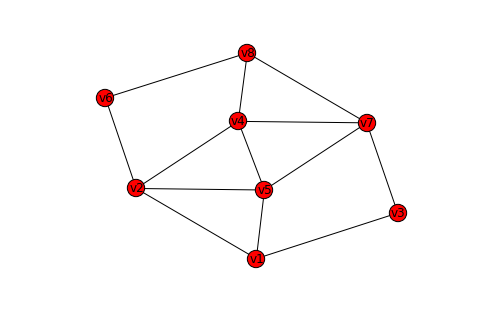

In [6]:
G1 = nx.Graph()
G1.add_nodes_from(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8'])
G1.add_edges_from([('v1', 'v2'), ('v1', 'v3'), ('v1', 'v5'), ('v2', 'v4'), ('v2', 'v5'), \
                   ('v2', 'v6'), ('v3', 'v7'), ('v4', 'v5'), ('v4', 'v7'), ('v4', 'v8'), \
                   ('v5', 'v7'), ('v6', 'v8'), ('v7', 'v8')])
nx.draw(G1, with_labels=True)

In [74]:
# M が G のマッチングであるか判定する
def is_matching(G, M):
    m_degree = {v:0 for v in G.nodes()}
    for e in M:
        if not (G.has_node(e[0]) and G.has_node(e[1])):
            return False
        if not G.has_edge(*e):
            return False
        if m_degree[e[0]] == 1 or m_degree[e[1]] == 1:
            return False
        m_degree[e[0]] += 1
        m_degree[e[1]] += 1
    return True   

In [75]:
M1 = [('v1', 'v2'), ('v4', 'v7'), ('v6', 'v8')]
is_matching(G1, M1)

True

In [76]:
M2 = [('v1', 'v3'), ('v2', 'v5'), ('v2', 'v6')]
is_matching(G1, M2)

False

In [51]:
# M が G の極大マッチングであるか判定する
def is_maximal_matching(G, M):
    if not is_matching(G, M):
        return False
    for e in G.edges():
        if e in M:
            continue
        M.append(e)
        if is_matching(G, M):
            print("Adding {0} results in a matching".format(e))
            return False
        M.remove(e)
    return True    

In [48]:
is_maximal_matching(G1, M1)

True

In [52]:
M3 = [('v1', 'v2'), ('v3', 'v7'), ('v6', 'v8')]
is_maximal_matching(G1, M3)

Adding ('v5', 'v4') results in a matching


False

In [77]:
# M が G の完全マッチングであるか判定する
def is_perfect_matching(G, M):
    m_degree = {v:0 for v in G.nodes()}
    for e in M:
        if not (G.has_node(e[0]) and G.has_node(e[1])):
            return False
        if not G.has_edge(*e):
            return False
        if m_degree[e[0]] == 1 or m_degree[e[1]] == 1:
            return False
        m_degree[e[0]] += 1
        m_degree[e[1]] += 1
    for v in G.nodes():
        if m_degree[v] == 0:
            return False 
    return True   

In [78]:
is_perfect_matching(G1, M1)

False

In [79]:
M4 = [('v1', 'v2'), ('v3', 'v7'), ('v4', 'v5'), ('v6', 'v8')]
is_perfect_matching(G1, M4)

True

In [60]:
# グラフの頂点数は，その完全マッチングの辺数の2倍に等しい
nx.number_of_nodes(G1) == len(M4) * 2

True

最大マッチングと増加道

In [73]:
# 最大マッチングの計算 (結果は辞書)
nx.max_weight_matching(G1)

{'v1': 'v3',
 'v2': 'v6',
 'v3': 'v1',
 'v4': 'v5',
 'v5': 'v4',
 'v6': 'v2',
 'v7': 'v8',
 'v8': 'v7'}

最大マッチングと最小頂点被覆

In [80]:
# C が G の頂点被覆であるか判定する
def is_vertex_cover(G, C):
    for v in C:
        if not G.has_node(v):
            return False
    for e in G.edges():
        if not (e[0] in C or e[1] in C):
            return False
    return True          

In [82]:
C1 = ['v2', 'v3', 'v4', 'v5', 'v6', 'v7']
is_vertex_cover(G1, C1)

True

In [83]:
C2 = ['v1', 'v2', 'v3', 'v5', 'v8']
is_vertex_cover(G1, C2)

False